## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **22nd November 2022 at 11:59 pm**. 

6. You are **not allowed to use a `for` loop in this assignment**.

## Fifa world cup
Read FIFA world cup attendance data from the page: https://en.wikipedia.org/wiki/FIFA_World_Cup . Use 'attendance' as the matching string to find the table. 

### 
Find the number of levels of column labels and row labels in the data 

*(2 points)*

In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [313]:
data = pd.read_html('https://en.wikipedia.org/wiki/FIFA_World_Cup',match='attendance')[0]
print(data.columns.nlevels)
print(data.index.nlevels)

2
1


Number of levels of column labels = 2, and number of levels of row labels = 1.

### 
Reduce the multiple levels of column labels to a single level as follows. If the column names at all the levels are different, then concatenate the names together. Otherwise, keep the name at the outer level. For example, if the column name is ('Hosts','Hosts'), it should change to 'Host'. If the column name is ('Highest attendances †','Number'), it should change to 'Highest attendances †Number'. Do not rename each column manually. Use a method that will work efficiently if there were a large number of columns, say $10,000$ columns. 

**Reminder: Do not use a `for` loop.**

*(10 points)*

In [311]:
#Get a boolean vector indicating the column positions on which the labels need to concatenated
a = ~(data.columns.get_level_values(0)==data.columns.get_level_values(1))

#Creating an array of column names based on level 0
col_names = np.array(data.columns.get_level_values(0))

#Appending column names from the 2 levels where they differ at the 2 levels
col_names[np.where(a)] = data.columns.get_level_values(0)[np.where(a)] + data.columns.get_level_values(1)[np.where(a)]

data.columns = col_names

data.head()

Year        Hosts Venues/Cities  Totalattendance †  Matches  \
0  1930      Uruguay           3/1             590549       18   
1  1934        Italy           8/8             363000       17   
2  1938       France          10/9             375700       18   
3  1950       Brazil           6/6            1045246       22   
4  1954  Switzerland           6/6             768607       26   

   Averageattendance Highest attendances ‡Number  \
0              32808                       93000   
1              21353                       55000   
2              20872                       58455   
3              47511                 173,850[86]   
4              29562                       63000   

         Highest attendances ‡Venue        Highest attendances ‡Game(s)  
0    Estadio Centenario, Montevideo  Uruguay 6–1 Yugoslavia, Semi-final  
1        Stadio Nazionale PNF, Rome     Italy 2–1 Czechoslovakia, Final  
2      Olympique de Colombes, Paris     France 1–3 Italy, Quarter-final  
3  Maracanã Stadium, Rio de Janeiro  Brazil 1–2 Uruguay, Deciding match  
4            Wankdorf Stadium, Bern     West Germany 3–2 Hungary, Final

## GDP per capita and population

Read the GDP per capita data from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

### Preparing GDP per capita data

#### 
Drop all the `Year` columns. Use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method with the `columns`, `level` and `inplace` arguments. Print the first 2 rows of the updated DataFrame.

*(4 points)*

In [283]:
# Read GDP per capita data from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita
gdp_per_capita_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita', match = 'Country')[0]
gdp_per_capita_data.drop(columns = 'Year',level=1,inplace=True)
gdp_per_capita_data.head(2)

Country/Territory UN Region   IMF[4] World Bank[5] United Nations[6]
  Country/Territory UN Region Estimate      Estimate          Estimate
0   Liechtenstein *    Europe        —        169049            180227
1          Monaco *    Europe        —        173688            173696

#### 
Drop the inner level of column labels. Use the `droplevel()` method. Print the first 2 rows of the updated DataFrame.

*(4 points)*

In [284]:
gdp_per_capita_data=gdp_per_capita_data.droplevel(1,axis=1)
gdp_per_capita_data.head(2)

Country/Territory UN Region IMF[4] World Bank[5] United Nations[6]
0   Liechtenstein *    Europe      —        169049            180227
1          Monaco *    Europe      —        173688            173696

#### 
Convert the columns consisting of GDP per capita by *IMF, World Bank*, and the *United Nations* to numeric. Apply a lambda function on these columns to convert them to numeric. Print the number of missing values in each column of the updated DataFrame.

Note: *Do not apply the function 3 times. Apply it once on a DataFrame consisting of these 3 columns.*

*(4 points)*

In [285]:
gdp_per_capita_data.iloc[:,2:] = gdp_per_capita_data.iloc[:,2:].apply(lambda x: pd.to_numeric(x,errors='coerce'))
gdp_per_capita_data.isnull().sum()

Country/Territory     0
UN Region             0
IMF[4]               28
World Bank[5]         7
United Nations[6]     8
dtype: int64

#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = lambda x:re.split(r'\[|/', x)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.

*(5 points)*

In [286]:
gdp_per_capita_data.columns = gdp_per_capita_data.apply(lambda x:re.split(r'\[|/', x.name)[0])
gdp_per_capita_data.head(2)

Country UN Region  IMF World Bank United Nations
0  Liechtenstein *    Europe  NaN   169049.0       180227.0
1         Monaco *    Europe  NaN   173688.0       173696.0

#### 
Create a new column `GDP_per_capita` that copies the GDP per capita values of the `United Nations`. If the GDP per capita is missing in the `United Nations` column, then copy it from the `World Bank` column. 

Print the number of missing values in the `GDP_per_capita` column.

*(4 points)*

In [287]:
gdp_per_capita_data['GDP_per_capita'] = gdp_per_capita_data['United Nations']
gdp_per_capita_data.loc[gdp_per_capita_data['GDP_per_capita'].isnull(),'GDP_per_capita'] = \
gdp_per_capita_data.loc[gdp_per_capita_data['GDP_per_capita'].isnull(),'World Bank']
gdp_per_capita_data.GDP_per_capita.isnull().sum()

0

### 
Drop all the columns except `Country` and `GDP_per_capita`. Print the first 2 rows of the updated DataFrame. 

*(4 points)*

In [288]:
gdp_per_capita_data=gdp_per_capita_data[['Country','GDP_per_capita']]
gdp_per_capita_data.head(2)

Country GDP_per_capita
0  Liechtenstein *       180227.0
1         Monaco *       173696.0

#### 
The country names contain some special characters (characters other than letters) and need to be cleaned. The following function can help clean country names:

```import re```


```country_names_clean_gdp_data = lambda x: re.sub(r'[^\w\s]', '', x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `gdp_per_capita_data`. Print the first 2 rows of the updated DataFrame.

*(3 points)*

In [289]:
country_names_clean_gdp_data = lambda x: re.sub(r'[^\w\s]', '', x).strip()
gdp_per_capita_data.loc[:,'Country'] = gdp_per_capita_data.loc[:,'Country'].apply(country_names_clean_gdp_data)
gdp_per_capita_data.head(2)

Country GDP_per_capita
0  Liechtenstein       180227.0
1         Monaco       173696.0

### Preparing population data

#### 
Read the population data from https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
Drop all columns except `Country / Area` and `Population (1 July 2019)`.

*(2 points)*

In [290]:
# Read GDP per capita data from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita
population_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)', match = 'Country')[0]
population_data = population_data.loc[:,['Country / Area','Population(1 July 2019)']]
population_data.head(2)

Country / Area  Population(1 July 2019)
0       China[a]               1433783686
1          India               1366417754

#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = (lambda x:re.split(r'\[|/|\(| ', x.name)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.

*(5 points)*

In [291]:
column_name_cleaner = lambda x:re.split(r'\[|/|\(| ', x.name)[0]
population_data.columns = population_data.apply(column_name_cleaner)
population_data.head(2)

Country  Population
0  China[a]  1433783686
1     India  1366417754

####  
The country names contain some special characters (characters other than letters) and need to be cleaned. The following function can help clean country names:

```import re```

```country_names_clean_population_data = lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `population_data`.

*(3 points)*

In [292]:
country_names_clean_population_data = lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip()
population_data.loc[:,'Country']=population_data.loc[:,'Country'].apply(country_names_clean_population_data)
population_data.head()

Country  Population
0          China  1433783686
1          India  1366417754
2  United States   329064917
3      Indonesia   270625568
4       Pakistan   216565318

### Merging GDP per capita and population datasets
Merge `gdp_per_capita_data` with `population_data` to get the population and GDP per capita of countries in a single dataset. Print the first two rows of the merged DataFrame.

Assume that:

1. We want to keep the GDP per capita of all countries in the merged dataset, even if their population in unavailable in the population dataset. For countries whose population in unavailable, their `Population` column will show `NA`.

2. We want to discard an observation of a country if its GDP per capita is unavailable.

*(4 points)*

In [293]:
gdp_per_capita_population = pd.merge(gdp_per_capita_data,population_data,how = 'left')
gdp_per_capita_population.head(2)

Country GDP_per_capita  Population
0  Liechtenstein       180227.0     38019.0
1         Monaco       173696.0     38964.0

### 
For how many countries in `gdp_per_capita_data` does the population seem to be unavailable in `population_data`? Note that you don't need to clean country names any further than cleaned by the functions provided.

Print the observations of `gdp_per_capita_data` with missing population.

*(3 points)*

In [294]:
gdp_per_capita_population.isnull().sum()

Country           0
GDP_per_capita    0
Population        8
dtype: int64

For 8 countries in the `gdp_per_capita_data`, the population seems unavailable in the `population_data`.

In [295]:
gdp_per_capita_population.loc[gdp_per_capita_population['Population'].isnull(),:]

Country GDP_per_capita  Population
35                 US Virgin Islands        39552.0         NaN
43                             Macau        37474.0         NaN
61          Saint Martin French part        21459.0         NaN
70           Sint Maarten Dutch part        20000.0         NaN
110  Saint Vincent and theGrenadines         7298.0         NaN
132                           Kosovo         4368.0         NaN
196                         Zanzibar         1031.0         NaN
204                     GuineaBissau          668.0         NaN

### Merging datasets with *similar* values in the *key* column

We suspect that population of more countries may be available in `population_data`. However, due to unclean country names, the observations could not merge. For example, the country *Saint Vincent and the Grenadines* is mentioned as *Saint Vincent and theGrenadines* in `gdp_per_capita_data` and *Saint Vincent and the Grenadines* in `population_data`. To resolve this issue, we'll use a different approach to merge datasts. We'll merge the population of a country to an observation in the GDP per capita dataset, whose name in `population_data` is the most *'similar'* to the name of the country in `gdp_per_capita_data`. 

#### 
Proceed as follows:

1. For each country in `gdp_per_capita_data`, find the `country` with the most *similar* name in `population_data`, based on the similarity score *(use the function provided below to compute the similarity score between two strings. The higher the score, the more similar are the strings. The similarity score is $1.0$ if two strings are exactly the same).*


2. Merge the population of the most *'similar'* country to the country in `gdp_per_capita_data`. The merged dataset must include 5 columns - the country name as it appears in `gdp_per_capita_data`, the GDP per capita, the country name of the most *similar* country as it appears in `population_data`, the population of that country, and the similarity score between the country names. 


3. After creating the merged dataset, **print** the rows of the dataset that have similarity scores less than 1.

Use the function below to compute the similarity score between the `Country` values of the two datasets:

`from difflib import SequenceMatcher`

`similar = lambda a,b: SequenceMatcher(None, a, b).ratio()`


**Reminder: Do not use a `for` loop**

*(18 points)*

**Hint:**

1. Define a function that computes the index of the observation having the most *similar* country name in `population_data` for an observation in `gdp_per_capita_data`. The function returns a Series consisting of the most similar country name, its population, and its similarity score *(This function can be written with only one line in its body, excluding the return statement and the definition statement. However, you may use as many lines as you wish)*.


2. Apply the function on the `Country` column of `gdp_per_capita_data`. A DataFrame will be obtained.


3. Concatenate the DataFrame obtained in (2) with `gdp_per_capita_data` with the pandas `concat()` function.

In [298]:
from difflib import SequenceMatcher

similar= lambda a,b: SequenceMatcher(None, a, b).ratio()

def merge_country(x):    
    sim_scores = population_data.loc[:,'Country'].apply(similar,b=x)
    return population_data.loc[sim_scores.idxmax(),['Country','Population']].append(pd.Series(max(sim_scores),index=['Similarity_score']))

In [299]:
similar_population_data=gdp_per_capita_data.Country.apply(merge_country)
gdp_per_capita_data_population=pd.concat([gdp_per_capita_data,similar_population_data],axis=1)
gdp_per_capita_data_population.loc[gdp_per_capita_data_population['Similarity_score']<1,:]

Country GDP_per_capita  \
35                 US Virgin Islands        39552.0   
43                             Macau        37474.0   
61          Saint Martin French part        21459.0   
70           Sint Maarten Dutch part        20000.0   
110  Saint Vincent and theGrenadines         7298.0   
132                           Kosovo         4368.0   
196                         Zanzibar         1031.0   
204                     GuineaBissau          668.0   

                              Country  Population  Similarity_score  
35                U.S. Virgin Islands      104578          0.944444  
43                              Macao      640445          0.800000  
61                       Sint Maarten       42388          0.555556  
70                       Sint Maarten       42388          0.685714  
110  Saint Vincent and the Grenadines      110589          0.984127  
132                           Morocco    36471769          0.461538  
196                            Zambia    17861030          0.571429  
204                     Guinea-Bissau     1920922          0.960000

#### 
In the dataset obtained in the previous question, for all observations where similarity score is less than 0.6, replace the population with `Nan`.

Print the observations of the dataset having missing values of population.

*(2 points)*

In [300]:
gdp_per_capita_data_population.loc[gdp_per_capita_data_population['Similarity_score']<0.6,'Population']=np.nan
gdp_per_capita_data_population.loc[gdp_per_capita_data_population.Population.isnull(),:]

Country GDP_per_capita       Country  Population  \
61   Saint Martin French part        21459.0  Sint Maarten         NaN   
132                    Kosovo         4368.0       Morocco         NaN   
196                  Zanzibar         1031.0        Zambia         NaN   

     Similarity_score  
61           0.555556  
132          0.461538  
196          0.571429

In [205]:
#'for' loop solution - just for understanding. A 'for' loop solution will not be accepted for this assignment.
gdp_per_capita_data['Similar_country'] = ''
gdp_per_capita_data['Similarity_score'] = ''
gdp_per_capita_data['Population'] = 0
i=0
for x in gdp_per_capita_data.loc[:,'Country']:
    sim_scores = population_data.loc[:,'Country'].apply(similar,b=x)
    gdp_per_capita_data.loc[gdp_per_capita_data.Country==x,'Similar_country'] = population_data.loc[sim_scores.idxmax(),'Country']
    gdp_per_capita_data.loc[gdp_per_capita_data.Country==x,'Similarity_score'] = max(sim_scores)
    gdp_per_capita_data.loc[gdp_per_capita_data.Country==x,'Population'] = population_data.loc[sim_scores.idxmax(),'Population(1 July 2019)']
    i=i+1

## GDP, surplus, and compensation

The dataset *Real GDP.csv* contains the GDP of each US State for all years starting from 1997 until 2020. The data is at *State* level, i.e., each observation corresponds to a unique State.

The dataset *Surplus.csv* contains the surplus of each US State for all years starting from 1997 until 2020. The data is at *year* level, i.e., each observation corresponds to a unique year.

The dataset *Compensation.csv* contains *Compensation* and *Chain-type quantity indexes for real GDP* for each US State and year starting from 1997 to 2020. The dataset is at *Year-State-Description* level, i.e., each observation corresponds to a unique `Year`-`State`-`Description` combination where `Description` refers to either *Compensation* or *Chain-type quantity indexes for real GDP*. 

### Combining datasets
Combine all these datasets to obtain a dataset at *State-Year* level, i.e., each observation corresponds to a unique `State`-`Year` combination. The combined dataset must contain the GDP, surplus, *Compensation*, and *Chain-type quantity indexes for real GDP* for each US State and all years starting from 1997 until 2020. *Note that each observation must contain the name of the US State, year, and the four values (GDP, surplus, compensation, and Chain-type quantity indexes for real GDP).*

**Hint**: Here is one way to do it:

1. Melt the GDP dataset to year-State level 

2. Melt the Surplus dataset to year-State level 

3. Pivot the compensation dataset to year-State level

4. Now that all the datasets are at the year-State level, merge them!

*(4 + 4 + 4 + 2 = 14 points)*

In [232]:
compensation = pd.read_csv('./Datasets/Compensation.csv')
surplus = pd.read_csv('./Datasets/Surplus.csv')
GDP = pd.read_csv('./Datasets/Real GDP.csv')

In [216]:
#Melting GDP dataset
GDP.drop(columns = 'Description',inplace = True)#Dropping the unncessary column 'Description'
GDP_melted = pd.melt(GDP,id_vars = 'State',var_name = 'Year',value_name = 'Real GDP')
GDP_melted.head()

State  Year   Real GDP
0     Alabama  1997   144501.2
1      Alaska  1997    42211.3
2     Arizona  1997   168408.8
3    Arkansas  1997    82571.3
4  California  1997  1378276.5

In [218]:
#Melting Surplus dataset
surplus_melted = surplus.melt('Year',var_name = 'State',value_name = 'Surplus')
surplus_melted.head()

Year    State  Surplus
0  1997  Alabama  37247.9
1  1998  Alabama  39368.1
2  1999  Alabama  41513.7
3  2000  Alabama  42583.4
4  2001  Alabama  43348.6

In [221]:
#Pivoting compensation data to Year-State level
compensation_pivoted = compensation.pivot(['Year','State'],'Description','value').reset_index()
compensation_pivoted.head()

Description  Year       State  Chain-type quantity indexes for real GDP  \
0            1997     Alabama                                    76.356   
1            1997      Alaska                                    72.424   
2            1997     Arizona                                    62.043   
3            1997    Arkansas                                    76.108   
4            1997  California                                    65.225   

Description  Compensation (millions of dollars)  
0                                       61083.8  
1                                       12347.8  
2                                       69876.9  
3                                       32715.5  
4                                      574432.9

In [233]:
#Method 1: Using merge()
GDP_melted.Year = GDP_melted.Year.astype(int) #Changing the datatype to match it with the dataset being merged
GDP_surplus_compensation = pd.merge(pd.merge(GDP_melted,surplus_melted),compensation_pivoted)
GDP_surplus_compensation.head()

State  Year   Real GDP   Surplus  \
0     Alabama  1997   144501.2   37247.9   
1      Alaska  1997    42211.3   11061.3   
2     Arizona  1997   168408.8   53776.0   
3    Arkansas  1997    82571.3   23316.0   
4  California  1997  1378276.5  431069.4   

   Chain-type quantity indexes for real GDP  \
0                                    76.356   
1                                    72.424   
2                                    62.043   
3                                    76.108   
4                                    65.225   

   Compensation (millions of dollars)  
0                             61083.8  
1                             12347.8  
2                             69876.9  
3                             32715.5  
4                            574432.9

In [252]:
#Method 2: Using concat()

#Sorting the surplus dataset so that its observations are in the same order as in the other two datasets
surplus_melted.sort_values(by = ['Year','State'],inplace=True)
surplus_melted.reset_index(drop=True,inplace = True)
GDP_surplus_compensation_region = pd.concat([GDP_melted,surplus_melted,compensation_pivoted],axis=1)

#Removing duplicate columns
GDP_surplus_compensation_region = GDP_surplus_compensation_region.loc[:,~GDP_surplus_compensation_region.columns.duplicated()]
GDP_surplus_compensation_region.head()

State  Year   Real GDP   Surplus  \
0     Alabama  1997   144501.2   37247.9   
1      Alaska  1997    42211.3   11061.3   
2     Arizona  1997   168408.8   53776.0   
3    Arkansas  1997    82571.3   23316.0   
4  California  1997  1378276.5  431069.4   

   Chain-type quantity indexes for real GDP  \
0                                    76.356   
1                                    72.424   
2                                    62.043   
3                                    76.108   
4                                    65.225   

   Compensation (millions of dollars)  
0                             61083.8  
1                             12347.8  
2                             69876.9  
3                             32715.5  
4                            574432.9

### Time trend: GDP, surplus, and compensation
Use a single plot to answer all three questions below by visualizing: 

1. How does the mean GDP (mean over all States) change with year? *(1 point for visualization)* 

2. How does the mean compensation (mean over all States) change with year? *(1 point for visualization)* 

3. How does the mean surplus (mean over all States) change with year? *(1 point for visualization)*

Also show the 95% confidence interval for the mean GDP, mean compensation, and mean surplus in the plot.

**Hint:** Use the *seaborn* function *lineplot()* . No calculations are needed. Just use *lineplot()* three times. 

*(4 points)*

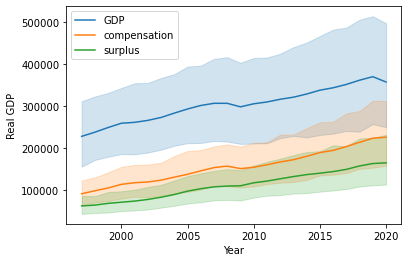

In [253]:
sns.lineplot(data = GDP_surplus_compensation, x = 'Year', y = 'Real GDP',label='GDP')
sns.lineplot(data = GDP_surplus_compensation, x = 'Year', y = 'Compensation (millions of dollars)',label = 'compensation')
sns.lineplot(data = GDP_surplus_compensation, x = 'Year', y = 'Surplus',label='surplus')
plt.legend(loc='upper left')

### Time trend: GDP with region
Merge the file *State_region_mapping.csv* with the dataset obtained in the previous question. Make a lineplot showing the mean GDP for each of the five regions with year. Do not display the confidence interval. Which two regions seems to have the least growth in GDP over the past 24 years? 

*(5 points)*

In [244]:
state_region = pd.read_csv('./Datasets/State_region_mapping.csv')
GDP_surplus_compensation_region=pd.merge(GDP_surplus_compensation,state_region)
GDP_surplus_compensation_region.head()

State  Year  Real GDP  Surplus  Chain-type quantity indexes for real GDP  \
0  Alabama  1997  144501.2  37247.9                                    76.356   
1  Alabama  1998  149568.2  39368.1                                    79.034   
2  Alabama  1999  154900.2  41513.7                                    81.851   
3  Alabama  2000  157221.3  42583.4                                    83.078   
4  Alabama  2001  156853.2  43348.6                                    82.883   

   Compensation (millions of dollars) Region  
0                             61083.8  South  
1                             64168.6  South  
2                             67225.1  South  
3                             69764.4  South  
4                             72038.4  South

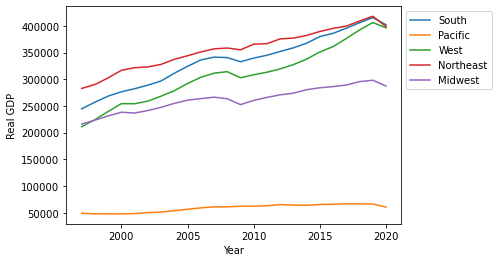

In [250]:
a=sns.lineplot(data = GDP_surplus_compensation_region, x = 'Year', y = 'Real GDP',hue = 'Region',ci=None)
a.legend(bbox_to_anchor=(1, 1))

Pacific and Midwest have the least growth in GDP over the past 24 years.